<a href="https://colab.research.google.com/github/rouatest21/ghatactionscourses/blob/main/Fashion_MNIST_ANN_TP24_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Fashion-MNIST ANN — TP Q24 & Q25
Ce notebook exécute le modèle ANN demandé (2×512 neurones) sur le dataset Fashion‑MNIST.
Il couvre :
- Chargement du dataset
- Prétraitement
- Construction du modèle ANN
- Entraînement & Évaluation
- Visualisation des courbes

In [1]:

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Charger dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape (28x28 -> 784)
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# Normalisation
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One‑hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construire modèle ANN 2×512
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,802 (2.57 MB)

 Trainable params: 671,754 (2.56 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [2]:

# Entraînement
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Évaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print("✅ Test accuracy:", test_acc)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7783 - loss: 0.6580 - val_accuracy: 0.8469 - val_loss: 0.4185
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8538 - loss: 0.4073 - val_accuracy: 0.8411 - val_loss: 0.4386
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8674 - loss: 0.3675 - val_accuracy: 0.8482 - val_loss: 0.4031
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8747 - loss: 0.3391 - val_accuracy: 0.8581 - val_loss: 0.3908
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8779 - loss: 0.3300 - val_accuracy: 0.8611 - val_loss: 0.3881
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8782 - loss: 0.3209 - val_accuracy: 0.8752 - val_loss: 0.3461
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8838 - loss: 0.3085 - val_accuracy: 0.8735 - val_loss: 0.3622
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8882 - loss: 0.2963 - val_

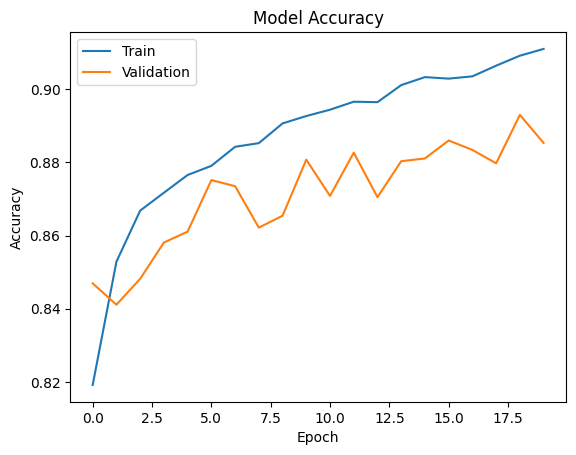

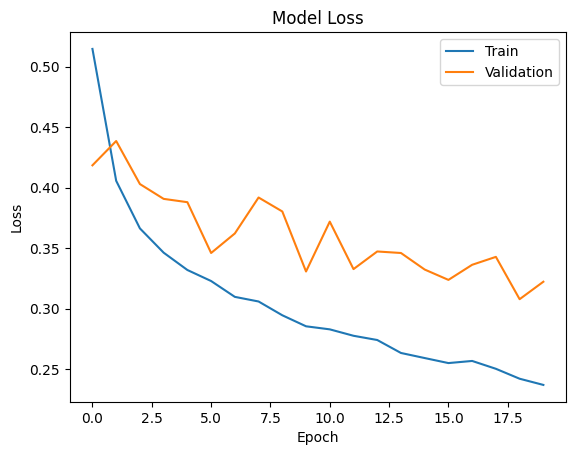

In [3]:

# Courbes
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
